In [1]:
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns

2023-02-04 10:32:29.182435: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-04 10:32:29.467231: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/humble/opt/rviz_ogre_vendor/lib:/opt/ros/humble/lib/x86_64-linux-gnu:/opt/ros/humble/lib
2023-02-04 10:32:29.467248: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-04 10:32:30.318509: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic 

In [2]:
# Load the data
df = pd.read_csv('BeijingPMtrain.csv')
df = df.fillna(method= 'bfill')
# dropping all the rows with NaN values
df = df.dropna()

In [3]:
# Select the input features
input_features = ['year', 'month', 'day','hour']

In [4]:
x = df[input_features].values
# Select the output feature as average
df["pm"] = df[["PM_Dongsi", "PM_Dongsihuan", "PM_Nongzhanguan", "PM_US Post"]].mean(axis=1)
y = df["pm"].values

In [5]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [6]:
# Define the input and output shapes
input_shape = (4,)
output_shape = (1,)


In [7]:
# Create the model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=input_shape))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=4, activation='linear'))
model.add(Dense(units=1, activation='linear'))

2023-02-04 10:33:14.126562: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-04 10:33:14.126778: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/humble/opt/rviz_ogre_vendor/lib:/opt/ros/humble/lib/x86_64-linux-gnu:/opt/ros/humble/lib
2023-02-04 10:33:14.126860: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/humble/opt/rviz_ogre_vendor/lib:/opt/ros/humble/lib/x86_64-linux-gnu:/opt/ros/humble/lib
2023-02-04 10:33:14.126920: W tensorflow/compiler/xla

In [8]:

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

# Train the model on the data
history = model.fit(x, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1096/1096 [==============================] - 2s 856us/step - loss: 2029.8546 - mean_squared_error: 2029.8546 - val_loss: 7746.5063 - val_mean_squared_error: 7746.5063
Epoch 2/10
1096/1096 [==============================] - 1s 638us/step - loss: 2003.1134 - mean_squared_error: 2003.1134 - val_loss: 8153.3306 - val_mean_squared_error: 8153.3306
Epoch 3/10
1096/1096 [==============================] - 1s 633us/step - loss: 1999.1240 - mean_squared_error: 1999.1240 - val_loss: 7755.7876 - val_mean_squared_error: 7755.7876
Epoch 4/10
1096/1096 [==============================] - 1s 665us/step - loss: 1993.4369 - mean_squared_error: 1993.4369 - val_loss: 7803.2290 - val_mean_squared_error: 7803.2290
Epoch 5/10
1096/1096 [==============================] - 1s 650us/step - loss: 1992.8628 - mean_squared_error: 1992.8628 - val_loss: 7855.2407 - val_mean_squared_error: 7855.2407
Epoch 6/10
1096/1096 [==============================] - 1s 714us/step - loss: 1989.3971 - mean_squared_error: 

In [9]:
# Evaluate the model on the test data
test_loss, test_mse = model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss}, Test mean squared error: {test_mse}')

274/274 [==============================] - 0s 423us/step - loss: 3169.6479 - mean_squared_error: 3169.6479
Test loss: 3169.64794921875, Test mean squared error: 3169.64794921875


In [10]:
# Use the model to make predictions
predictions = model.predict(x_test)

274/274 [==============================] - 0s 383us/step


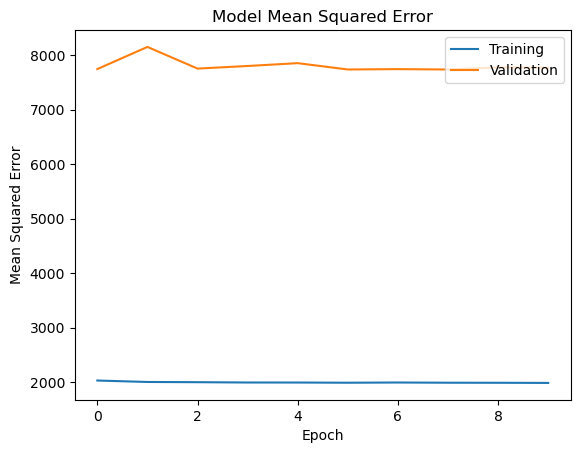

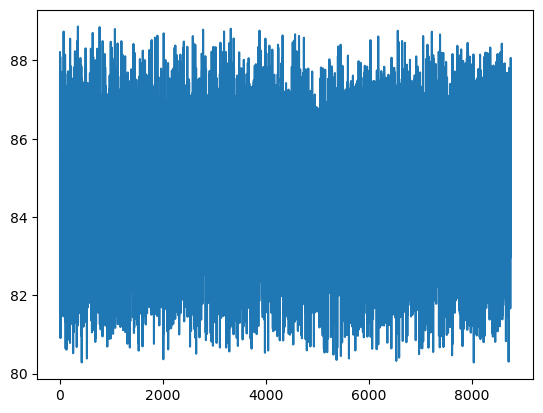

In [11]:
# Plot the training and validation loss
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()
plt.plot(predictions)